In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
import numpy as np

In [3]:
from sklearn.datasets import make_blobs  
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [4]:

n_clusters = 4
     

In [5]:
myu = X[np.random.choice(len(X),size=n_clusters,replace=False)]

In [6]:

print(myu)

[[1.35678894 4.36462484]
 [1.73810647 0.71629308]
 [0.96217896 4.51795326]
 [0.72144399 4.08475018]]


[Problem 2] Create a function to find SSE [Problem 3] Allocation to a cluster [Question 4] Moving the center point [Question 5] Repetition [Question 6] Calculation with different initial values

In [7]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters=2,n_init=20,n_iter=100,verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.verbose = verbose
        self.best_sse = 10**20

    def fit(self, X):
        for i in range(self.n_init):
            self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]
            cluster = np.zeros(len(X))
            X_cluster = np.concatenate([X,cluster.reshape(-1,1)],axis=1)
            for j in range(self.n_iter):
                self.calc_sse(X_cluster)
                self._update_cluster(X_cluster)
                self._update_myu(X_cluster)
                if self.verbose:
                    print("初期化：%s　学習回数：%s　最善のSSE：%s"%(i,j,self.best_sse))

    def calc_sse(self,X):
            sse = 0
            for i in range(len(X)):
                for j in range(self.n_clusters):
                    if j == X[i,-1]:
                        sse += np.sum((X[i,:-1]-self.myu[j])**2)
            if self.best_sse > sse:
                self.best_sse = sse
                self.record_myu = self.myu
                self.record_cluster = self.n_clusters

    def _update_cluster(self,X):
            for i in range(len(X)):
                dist_m = 10**20
                for j in range(self.n_clusters):
                    dist = np.sqrt(np.sum((X[i,:-1]-self.myu[j])**2))
                    if dist < dist_m:
                        dist_m = dist
                        X[i,-1] = j

    def _update_myu(self,X):
            for j in range(self.n_clusters):
                self.myu[j] = np.mean(X[X[:,-1]==j,:-1],axis=0)


    def predict(self, X):
        y_pred = np.zeros(len(X))
        for i in range(len(X)):
            dist_m = 10**20
            for j in range(self.record_cluster):
                dist = np.sqrt(np.sum((X[i]-self.record_myu[j])**2))
                if dist < dist_m:
                    dist_m = dist
                    y_pred[i] = j
        return y_pred

【Question 7】Presumption

In [16]:
X_train, X_valid = \
train_test_split(X,train_size=0.8,random_state=None)

In [17]:
clf = ScratchKMeans(n_clusters=4,n_init=5,n_iter=100,verbose=True)
clf.fit(X_train)

初期化：0　学習回数：0　最善のSSE：1985.5073387482262
初期化：0　学習回数：1　最善のSSE：54.32786070174595
初期化：0　学習回数：2　最善のSSE：37.567544238005816
初期化：0　学習回数：3　最善のSSE：37.567544238005816
初期化：0　学習回数：4　最善のSSE：37.567544238005816
初期化：0　学習回数：5　最善のSSE：37.567544238005816
初期化：0　学習回数：6　最善のSSE：37.567544238005816
初期化：0　学習回数：7　最善のSSE：37.567544238005816
初期化：0　学習回数：8　最善のSSE：37.567544238005816
初期化：0　学習回数：9　最善のSSE：37.567544238005816
初期化：0　学習回数：10　最善のSSE：37.567544238005816
初期化：0　学習回数：11　最善のSSE：37.567544238005816
初期化：0　学習回数：12　最善のSSE：37.567544238005816
初期化：0　学習回数：13　最善のSSE：37.567544238005816
初期化：0　学習回数：14　最善のSSE：37.567544238005816
初期化：0　学習回数：15　最善のSSE：37.567544238005816
初期化：0　学習回数：16　最善のSSE：37.567544238005816
初期化：0　学習回数：17　最善のSSE：37.567544238005816
初期化：0　学習回数：18　最善のSSE：37.567544238005816
初期化：0　学習回数：19　最善のSSE：37.567544238005816
初期化：0　学習回数：20　最善のSSE：37.567544238005816
初期化：0　学習回数：21　最善のSSE：37.567544238005816
初期化：0　学習回数：22　最善のSSE：37.567544238005816
初期化：0　学習回数：23　最善のSSE：37.567544238005816
初期化：0　学習回数：24　最善のSSE：37.567544238005816
初期化：0　学習回数：

In [15]:
pred = clf.predict(X_valid)

[Problem 8] Implementation of elbow method

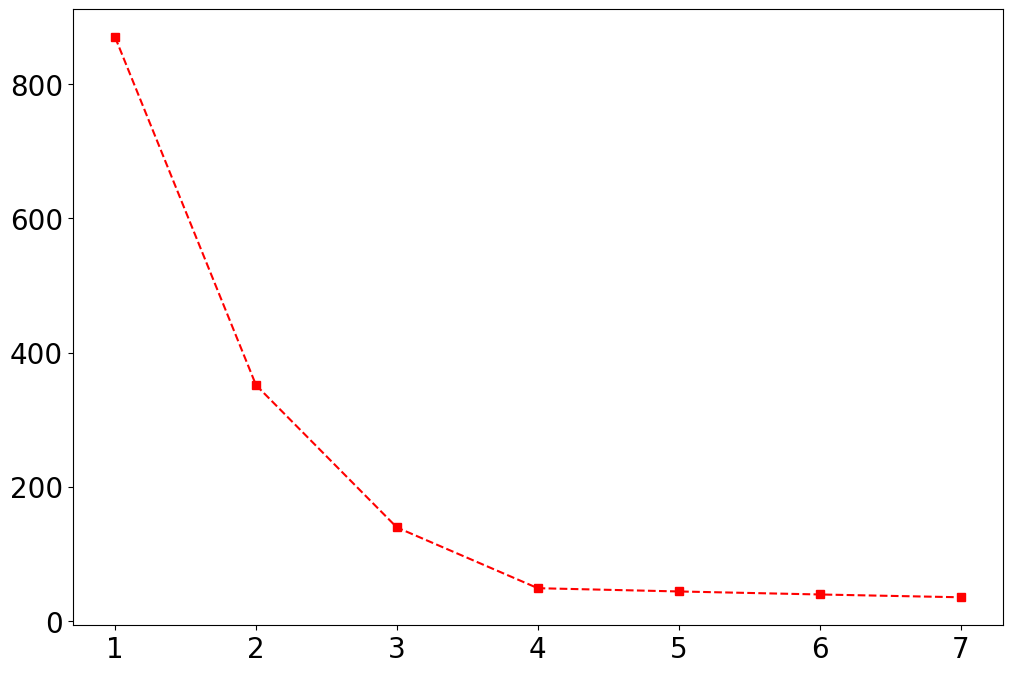

In [14]:
elbow = {}
for k in range(1,8):
    model = ScratchKMeans(n_clusters=k,n_init=5,n_iter=100,verbose=False)
    model.fit(X)
    elbow[k] = model.best_sse
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.plot(list(elbow.keys()),list(elbow.values()),'rs--');